<a href="https://colab.research.google.com/github/Mercymerine/Machine_learning2/blob/main/time_series_take_three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
from datetime import datetime
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

## **Loading the data**

In [58]:
tickers = ['^GSPC', '^GDAXI', '^FTSE', '^N225']
data = yf.download(tickers, period='10y')
data = data['Close'].reset_index()
data = data.set_index('Date')
data.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,^FTSE,^GDAXI,^GSPC,^N225
Date,,,,
2014-08-07,6597.399902,9038.969727,NaN,NaN
2014-08-08,6567.399902,9009.320312,1931.589966,14778.370117
2014-08-11,6632.799805,9180.740234,1936.920044,15130.519531
2014-08-12,6632.399902,9069.469727,1933.750000,15161.309570
2014-08-13,6656.700195,9198.879883,1946.719971,15213.629883


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2604 entries, 2014-08-07 to 2024-08-08
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^FTSE   2526 non-null   float64
 1   ^GDAXI  2537 non-null   float64
 2   ^GSPC   2516 non-null   float64
 3   ^N225   2445 non-null   float64
dtypes: float64(4)
memory usage: 101.7 KB


**Set the frequency to Business Day**

In [60]:
data.asfreq('b').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2611 entries, 2014-08-07 to 2024-08-08
Freq: B
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^FTSE   2526 non-null   float64
 1   ^GDAXI  2537 non-null   float64
 2   ^GSPC   2516 non-null   float64
 3   ^N225   2445 non-null   float64
dtypes: float64(4)
memory usage: 102.0 KB


**Missingness**

In [42]:
# Using interpolation to impute missing values

In [61]:
data['^FTSE']

,^FTSE
Date,
2014-08-07,6597.399902
2014-08-08,6567.399902
2014-08-11,6632.799805
2014-08-12,6632.399902
2014-08-13,6656.700195
...,...
2024-08-02,8174.700195
2024-08-05,8008.200195
2024-08-06,8026.700195


In [62]:
data.isna().sum()

,0
Ticker,
^FTSE,78
^GDAXI,67
^GSPC,88
^N225,159


In [63]:
data['ftse'] = data['^FTSE'].interpolate(method = 'linear')
data['dax'] = data['^GDAXI'].interpolate(method='linear')
data['s&p'] = data['^GSPC'].interpolate(method='linear')
data['nikkei'] = data['^N225'].interpolate(method='linear')

In [64]:
data.head()

Ticker,^FTSE,^GDAXI,^GSPC,^N225,ftse,dax,s&p,nikkei
Date,,,,,,,,
2014-08-07,6597.399902,9038.969727,NaN,NaN,6597.399902,9038.969727,NaN,NaN
2014-08-08,6567.399902,9009.320312,1931.589966,14778.370117,6567.399902,9009.320312,1931.589966,14778.370117
2014-08-11,6632.799805,9180.740234,1936.920044,15130.519531,6632.799805,9180.740234,1936.920044,15130.519531
2014-08-12,6632.399902,9069.469727,1933.750000,15161.309570,6632.399902,9069.469727,1933.750000,15161.309570
2014-08-13,6656.700195,9198.879883,1946.719971,15213.629883,6656.700195,9198.879883,1946.719971,15213.629883


In [65]:
filt_data = data[['ftse', 'dax', 's&p', 'nikkei']]
filt_data.head()

Ticker,ftse,dax,s&p,nikkei
Date,,,,
2014-08-07,6597.399902,9038.969727,NaN,NaN
2014-08-08,6567.399902,9009.320312,1931.589966,14778.370117
2014-08-11,6632.799805,9180.740234,1936.920044,15130.519531
2014-08-12,6632.399902,9069.469727,1933.750000,15161.309570
2014-08-13,6656.700195,9198.879883,1946.719971,15213.629883


In [66]:
filt_data.isna().sum()

,0
Ticker,
ftse,0
dax,0
s&p,1
nikkei,1


In [68]:
rows_with_missing_values = filt_data[filt_data.isnull().any(axis=1)]

# Display the rows with missing values
print(rows_with_missing_values)


Ticker             ftse          dax  s&p  nikkei
Date                                             
2014-08-07  6597.399902  9038.969727  NaN     NaN


In [69]:
filt_data = filt_data.interpolate(method = 'linear').bfill()

In [70]:
filt_data.isna().sum()

,0
Ticker,
ftse,0
dax,0
s&p,0
nikkei,0


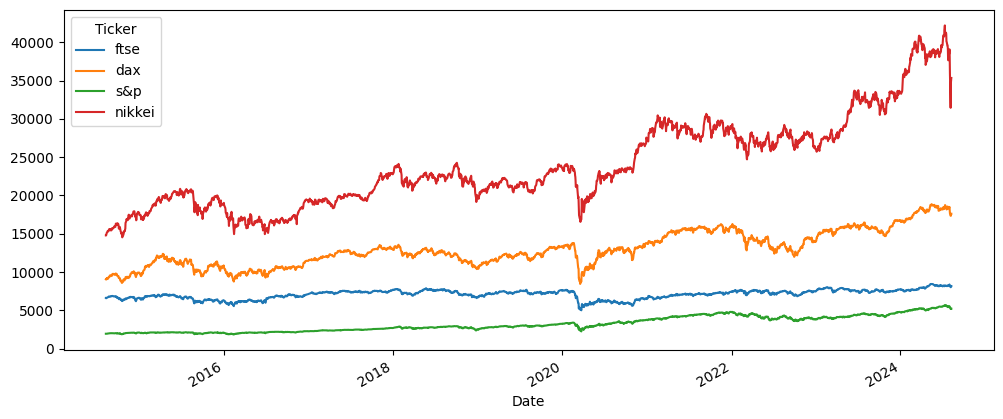

In [71]:
filt_data.plot(figsize=(12, 5))
plt.show()

**We'll proceed with nikkei**

In [72]:
df = filt_data[['nikkei']]
df.head()

Ticker,nikkei
Date,
2014-08-07,14778.370117
2014-08-08,14778.370117
2014-08-11,15130.519531
2014-08-12,15161.309570
2014-08-13,15213.629883


### **Decomposition**

In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [74]:
df = df.asfreq('B')

In [75]:
df['nikkei'].interpolate(method='linear', inplace=True)

In [76]:
df.isna().sum()

,0
Ticker,
nikkei,0


In [77]:
add_decomp = seasonal_decompose(df, model='additive')

In [78]:
add_decomp.seasonal

,seasonal
Date,
2014-08-07,-3.997416
2014-08-08,-12.250548
2014-08-11,-8.127762
2014-08-12,14.600675
2014-08-13,9.775052
...,...
2024-08-02,-12.250548
2024-08-05,-8.127762
2024-08-06,14.600675


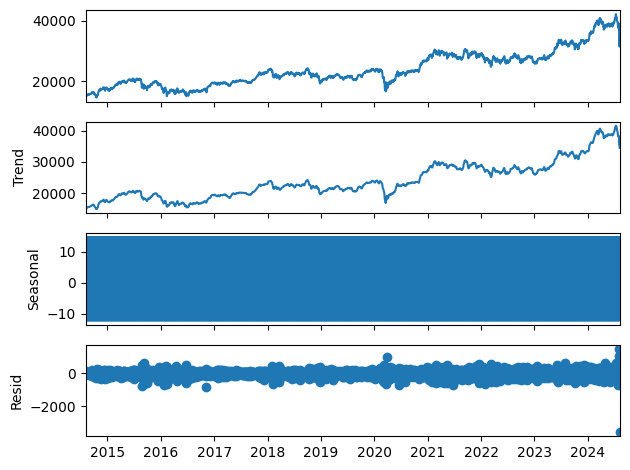

In [79]:
#Additional decomposition
add_decomp.plot()
plt.show()

In [80]:
# Multiplicative decomposition
mul_decomp = seasonal_decompose(df, model='multiplicative')

In [81]:
mul_decomp.seasonal

,seasonal
Date,
2014-08-07,0.999820
2014-08-08,0.999533
2014-08-11,0.999778
2014-08-12,1.000496
2014-08-13,1.000373
...,...
2024-08-02,0.999533
2024-08-05,0.999778
2024-08-06,1.000496


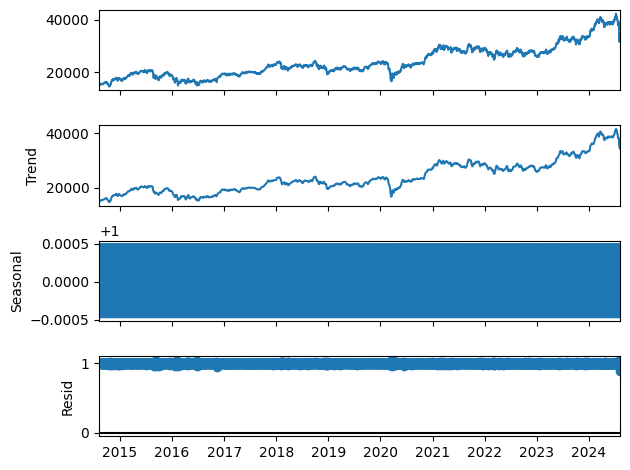

In [82]:
mul_decomp.plot()
plt.show()

## **Autocorrelation**

Analyze the relationship between a time series and its own lagged versions

**ACF**

In [83]:
import statsmodels.graphics.tsaplots as sgt

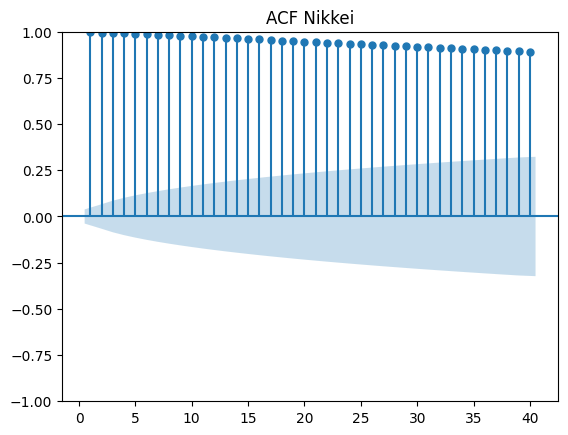

In [84]:
sgt.plot_acf(df, lags=40, zero=False)
plt.title('ACF Nikkei')
plt.show()

In [85]:
white_noise = np.random.normal(df['nikkei'].mean(), df['nikkei'].std(), size=len(df))
df['white_noise'] =  white_noise

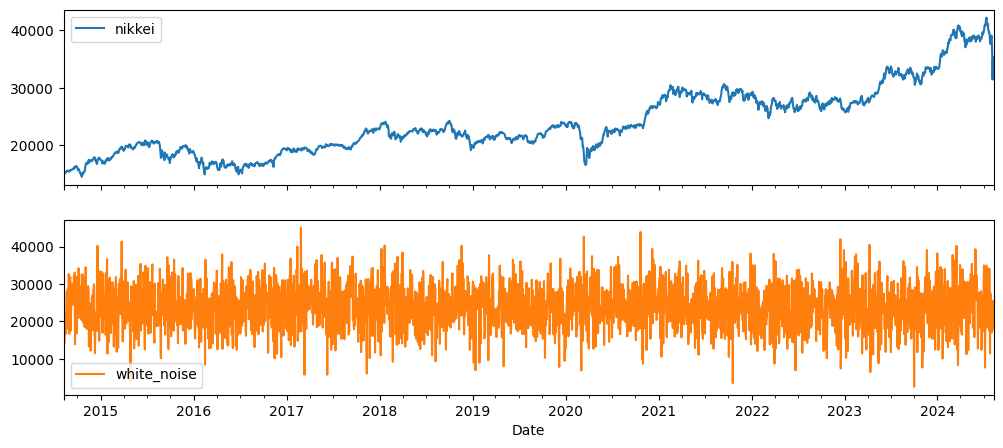

In [86]:
df[['nikkei', 'white_noise']].plot(figsize=(12, 5), subplots=True)
plt.show()

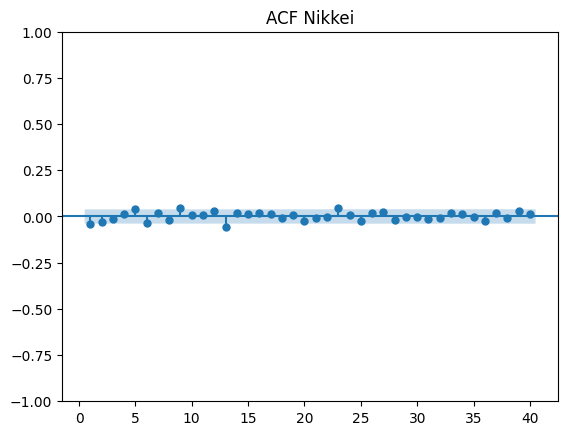

In [87]:
sgt.plot_acf(df['white_noise'], lags=40, zero=False)
plt.title('ACF Nikkei')
plt.show()

## **PACF**

Only direct effect

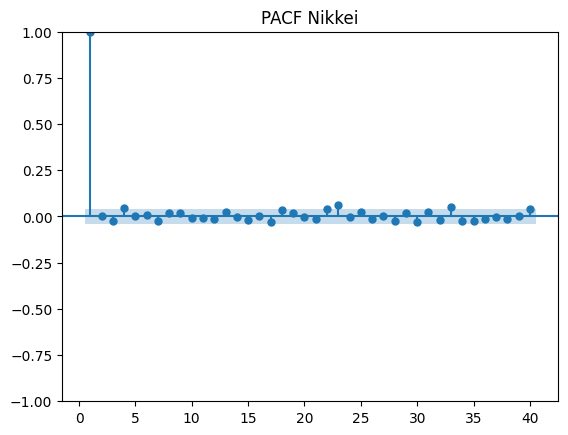

In [88]:
sgt.plot_pacf(df['nikkei'], lags=40, zero=False, method=('ols'))
plt.title('PACF Nikkei')
plt.show()

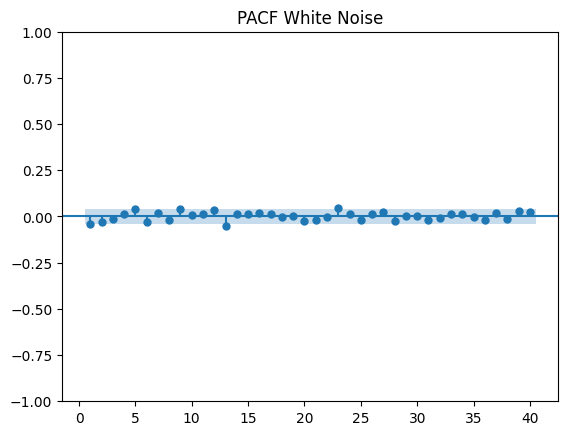

In [89]:
sgt.plot_pacf(df['white_noise'], lags=40, zero=False, method=('ols'))
plt.title('PACF White Noise')
plt.show()

**The decomposition residuals**

Focus: Isolates the autocorrelation patterns present in the unexplained variations of the data

In [90]:
add_residuals = add_decomp.resid
add_residuals

,resid
Date,
2014-08-07,NaN
2014-08-08,NaN
2014-08-11,126.207449
2014-08-12,27.029013
2014-08-13,-23.818997
...,...
2024-08-02,67.604064
2024-08-05,-3585.358176
2024-08-06,162.434091


/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


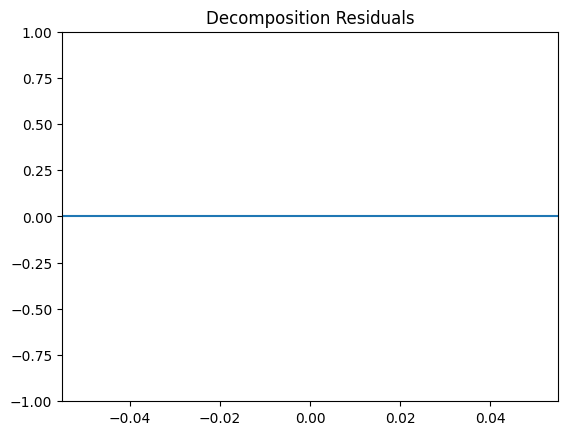

In [92]:
sgt.plot_acf(mul_decomp.resid, lags=40, zero=False)
plt.title('Decomposition Residuals')
plt.show()

## **Stationerity**

Stationerity is crucial in time series analysis because many statistical models assume that the underlying series is stationery, meaning that its statistcal properties (such as mean, variance and autocorrelation) do not change overtime

In [94]:
import statsmodels.tsa.stattools as sts

In [95]:
adf_results = sts.adfuller(df['nikkei'])
adf_results

(-0.9772987874921852,
 0.7614537463042166,
 3,
 2607,
 {'1%': -3.4328608364042927,
  '5%': -2.8626492942003465,
  '10%': -2.567360516871384},
 36773.456270971554)

In [96]:
adf_statistic = adf_results[0]
p_value = adf_results[1]
usedlag = adf_results[2]
nobs = adf_results[3]
critical_values = adf_results[4]
icbest = adf_results[5]


In [97]:

print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)
print('Number of Lags Used:', usedlag)
print('Number of Observations Used:', nobs)
print('Critical Values:')
for key, value in critical_values.items():
    print(f'\t{key}: {value}')


ADF Statistic: -0.9772987874921852
p-value: 0.7614537463042166
Number of Lags Used: 3
Number of Observations Used: 2607
Critical Values:
	1%: -3.4328608364042927
	5%: -2.8626492942003465
	10%: -2.567360516871384
